# Visualizing data 

Viewing data in a comprehensible way is essential for every data scientist. 
There are two excellent libraries that satisfy that need:

*  [Matplotlib](https://matplotlib.org/) - very popular 2-d visualization library, may be considered as the 'standard'. It produces publication-quality charts and is customizable in every imaginable way. Many libraries (like pandas) use matplotlib to produce charts, resulting in an uniform experience. Matplotlib is very versatile, just look at the [gallery](https://matplotlib.org/gallery/index.html). The only place where this library falls a bit short is interactivity. While it is possible to create interactive charts (as we'll see later), the charts tend to be a bit slow.
* [Bokeh](https://bokeh.pydata.org/en/latest/) is an *interactive* visualization library that runs on javascript. It is relatively new, but produces [excellent graphics](https://bokeh.pydata.org/en/latest/). A very important advantage is that the charts can be embedded in a html document without loosing interactivity! 



## Visualization with matplotlib

[ref]: # (plotting - matplotlib, interactive)


In [1]:
# import scientific libraries, including 'plot' function
from pylab import *

# configure for interactive plots
%matplotlib notebook


Matplotlib is easy to use with `numpy` arrays:

<IPython.core.display.Javascript object>


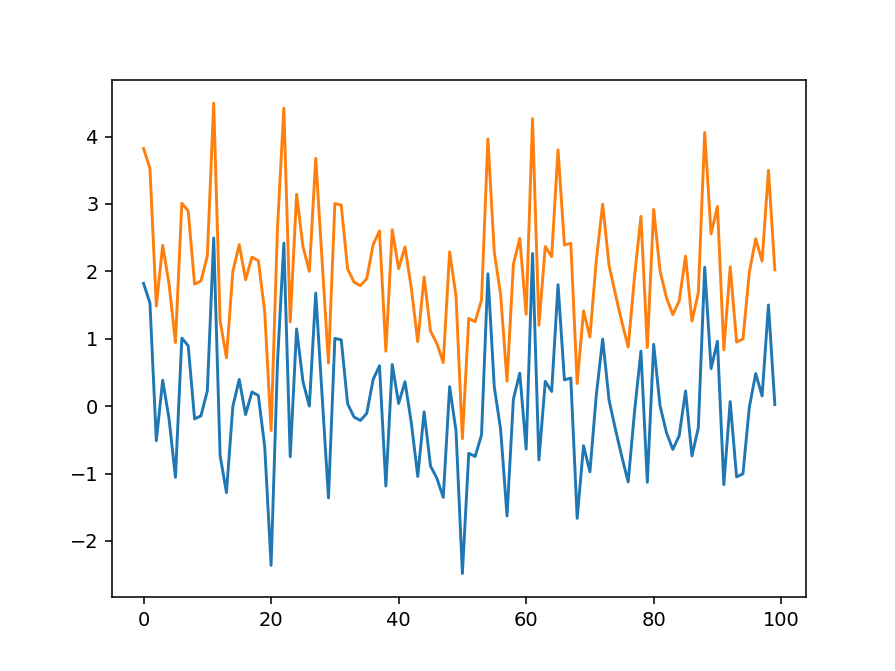

In [2]:
a = np.random.randn(100)
plot(a)


### Creating figures

[ref]: # (plotting - matplotlib figures)

`matplotlib` normally plots to the last used figure, so making a new plot will result in adding data to the figure above.


In [3]:
plot(a+2)

If a new figure is desired, it should be created with `figure()` function.
The function returns an `axis` variable, which can be used later if we want to add data to the figure.

<IPython.core.display.Javascript object>


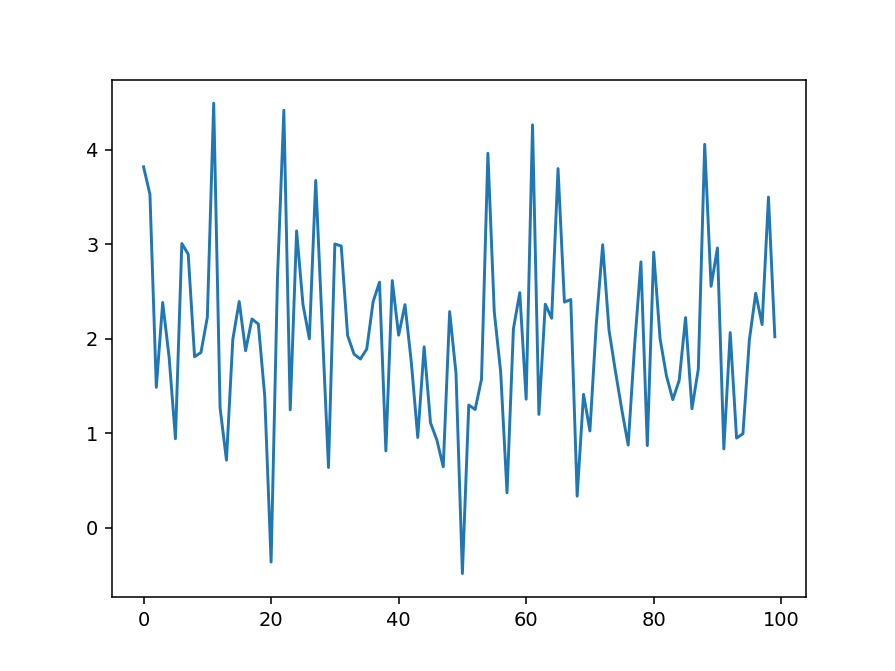

In [4]:
figure()
plot(a+2)

### Making nicer plots

Default `matplotlib` plots do not look that pretty, but this can be easily improved with a couple of lines of configuration code.

For a an overview of plotting styles, see [matplotlib docs](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)


In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # use nicer style

# bigger fitures
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)


<IPython.core.display.Javascript object>


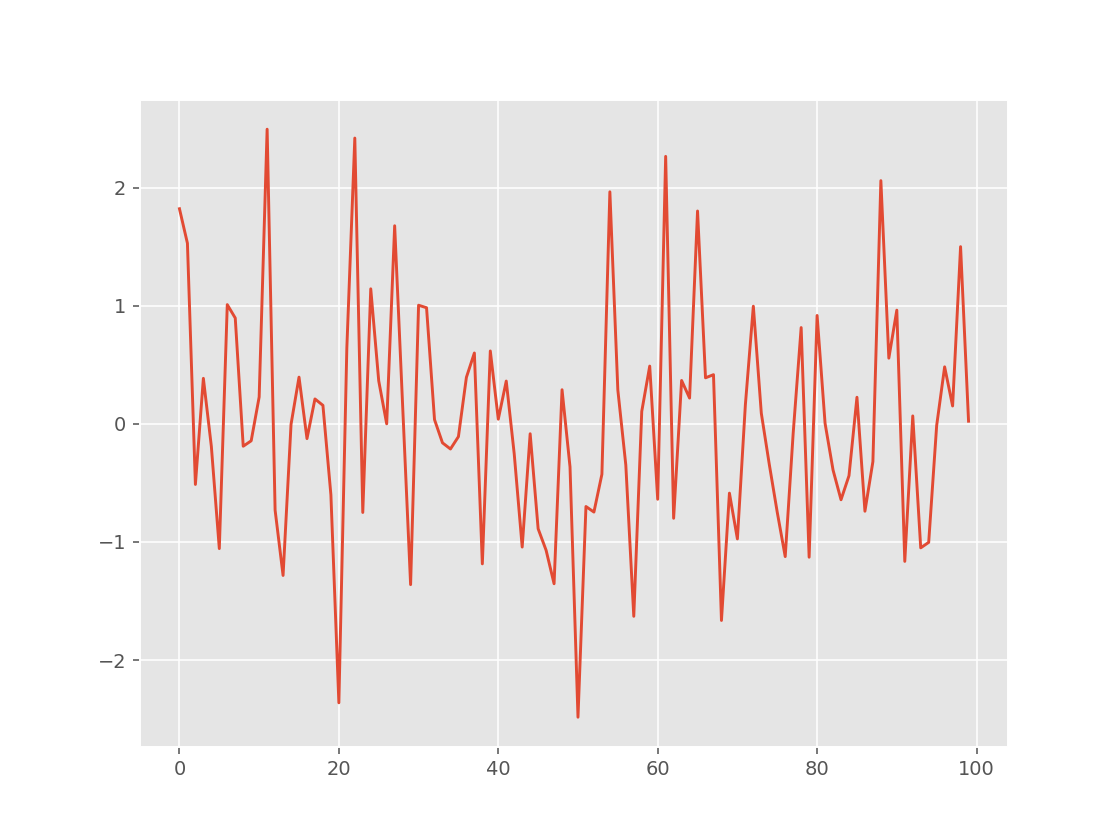

In [6]:
figure() # create a new figure
plot(a)

## Plotting with Pandas

Plotting functions are already [integrated](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) into pandas, so you can use them straight away with class methods:

[ref]: # (plotting - pandas)

<div class="alert alert-info">
**note:**

 pandas automatically creates new figures for each plot. If you want to plot to existing figure, use the `ax` (see [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) ) parameter. To get the *last* created axes, use `gca()` function.

</div>


In [7]:
import pandas as pd
pd.options.display.max_rows = 10 # conserve screen space when showing tables

# load example data
df = pd.read_csv('data/spy_daily.csv', index_col=0,parse_dates=True).tail(250)

# show data
df

,open,high,low,close
Date,,,,
2016-12-08,224.57,225.70,224.26,225.15
2016-12-09,225.41,226.53,225.37,226.51
2016-12-12,226.40,226.96,225.76,226.25
2016-12-13,227.02,228.34,227.00,227.76
2016-12-14,227.41,228.23,225.37,225.88
...,...,...,...,...
2017-11-29,263.02,263.63,262.20,262.71
2017-11-30,263.76,266.05,263.67,265.01
2017-12-01,264.76,265.31,260.76,264.46


<IPython.core.display.Javascript object>


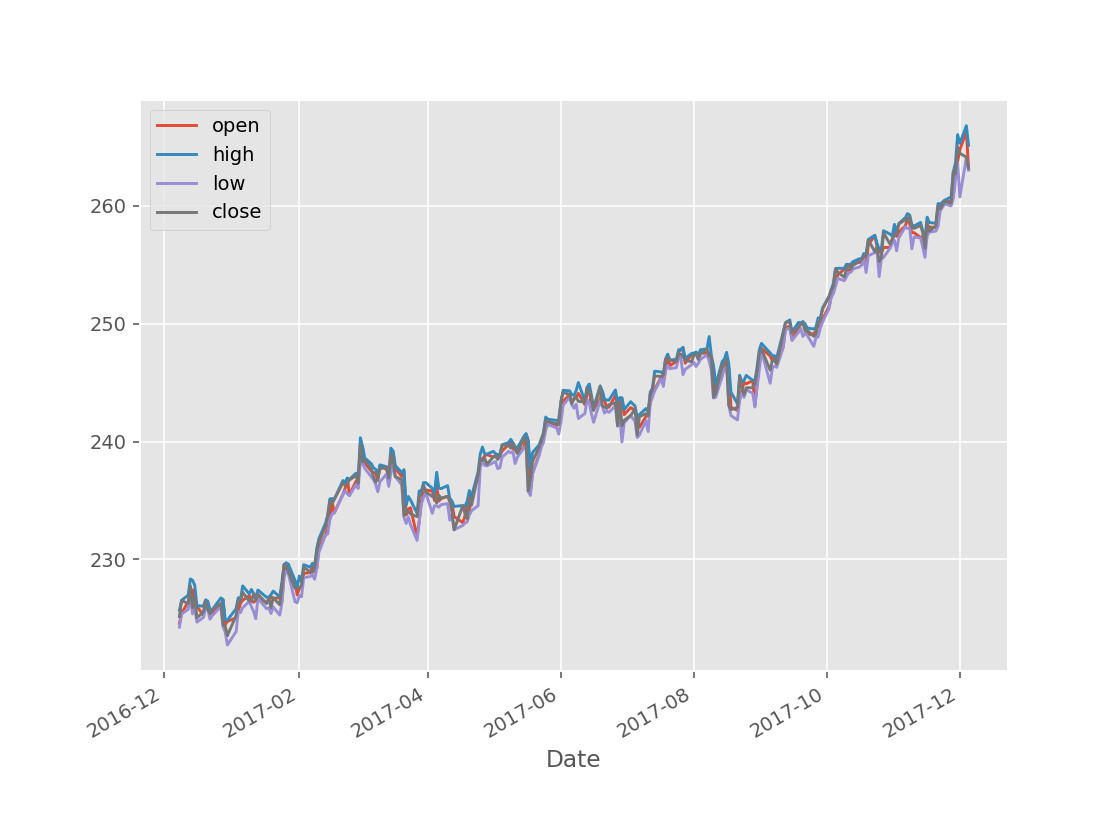

In [8]:
ax = df.plot()

<IPython.core.display.Javascript object>


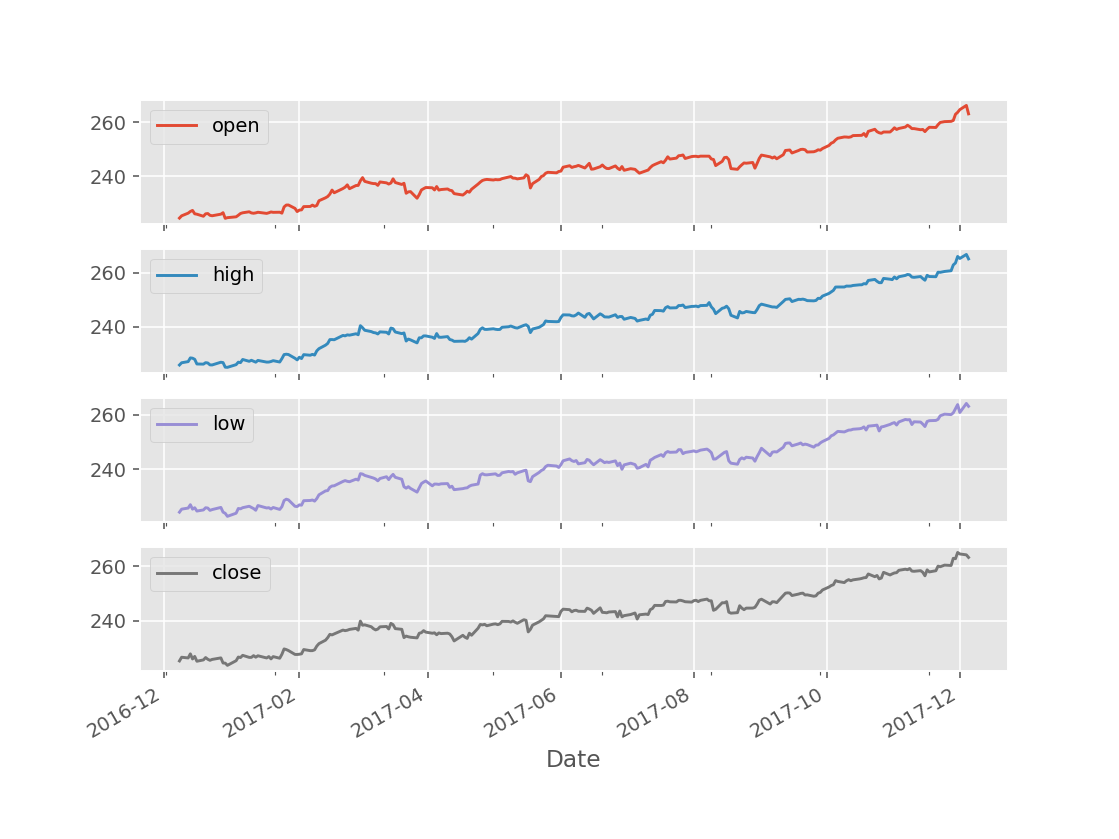

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa016b1e080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa016991ba8>], dtype=object)

In [9]:
# or plot with parameters, for example separate subplots:
df.plot(subplots=True)

<IPython.core.display.Javascript object>


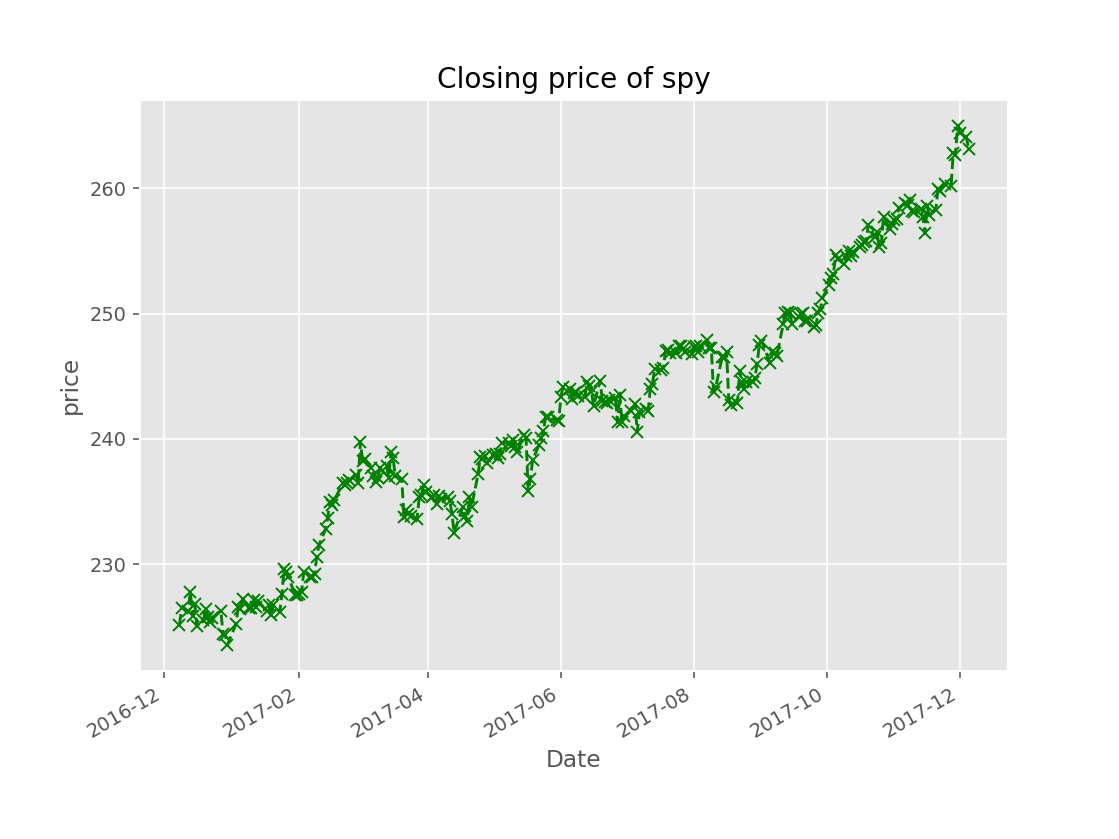

In [10]:
# we can also provide styling parameters 
# and add legend etc.
figure()

df.close.plot(style='gx--') # green line, x - marker, dashed
ylabel('price')
title('Closing price of spy')

### Static plots

[ref]: # (ploting - matplotlib, static)

Sometimes interactive plots is not what we want, so we can configure matplotlib to insert non-interactive (inline) 
plots:

<div class="alert alert-info">
**note:**

 switching to static plots will disable all interactive plots, so the code below is not executed.

</div>

## Bokeh plots

The Bokeh module is well [documented](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb#Tutorial) . Creating plots is explained in good detail in the [example notebooks](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/tutorial/00%20-%20Introduction%20and%20Setup.ipynb) section.  You'll notice that quite a couple of lines of code are needed to create a good looking chart, however you get all the flexibility.

<div class="alert alert-info">
**note:**

  bokeh charts are embedded in a notebook, so you don't have to run the code to see the output. However for security reasons javascript code is not trusted in notebooks from third parties. To show the charts below, you need to make this notebook trusted first. To do this, press *not trusted* button in the upper right corner of Jupyter interface and select *trust this notebook*

</div>


Let's make a simple plot:


In [11]:
# standard inputs
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook() # don't forget this one to embed results in the notebook


x = arange(len(df))
y = df.close.values

p = figure(plot_width=800)
p.line(x,y)
show(p)

Loading BokehJS ...

The basic plot above is made with only a couple of lines of code, however you'll notice that 

1. only close values are plotted, to plot ohlc data, we need to call `line` function for each column.
2. x-axis contains data index instead of dates. 




## TWP plotting class 

For financial data, most of the time we want candlesticks and some markers, so I wrote a plotting module ([documentation](http://sjev.github.io/trading-with-python/plotting.html#plotting-module) that simplifies quick plotting. 

Let's give it a quick spin:

In [12]:
from tradingWithPython.lib import plotting

# calculate bollinger bands
n = 20 # period
mean = df.close.rolling(n).mean()
std = df.close.rolling(n).std() # standard deviation
upper = mean+2*std
lower = mean-2*std



# create Plot class
p = plotting.Plot()

# plot candlesticks from ohlc
p.candlestick(df)

# plot bollinger bands
p.line(mean,color='red')
p.line(upper,color='#0066DD')
p.line(lower,color='#0066DD')


# add 'buy' markers
idx = [100,200] # suppose we buy on days 100 and 200
p.triangle(df.close.iloc[idx],color='green',orientation='up')

# add 'sell' markers
idx = [150,220] # and sell on these days
p.triangle(df.close.iloc[idx],color='red',orientation='down')

p.show()

{'color': 'red'}
{'color': '#0066DD'}
{'color': '#0066DD'}


There you go, a pretty descent interactive chart with a just several lines of code.